In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import 

In [5]:
data = pd.read_csv("Dataset_B_hotel.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [17]:
data_missing = data.isnull().sum()
data_missing

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64

In [51]:
data_clean = data.dropna()
data_clean.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [52]:
data_clean = data_clean.drop(["Booking_ID"], axis=1)
data_clean["required_car_parking_space"] = data_clean["required_car_parking_space"].astype(str)
data_clean

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [53]:
num_cols = data_clean.select_dtypes(include=["number"]).columns.to_list()
cat_cols = data_clean.select_dtypes(exclude=["number"]).columns.to_list()

print("numerical columns : ", num_cols)
print("categorical columns : ", cat_cols)

numerical columns :  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
categorical columns :  ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [ ]:
for i in cat_cols:
    print(i)
    print(data_clean[i].unique())

# type_of_meal_plan
# [0 3 1 2]
# required_car_parking_space
# [0 1]
# room_type_reserved
# [0 3 1 5 4 6 2]
# market_segment_type
# [3 4 2 1 0]
# booking_status
# [1 0]

# type_of_meal_plan
# ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
# required_car_parking_space
# ['0.0' '1.0']
# room_type_reserved
# ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
#  'Room_Type 7' 'Room_Type 3']
# market_segment_type
# ['Offline' 'Online' 'Corporate' 'Complementary' 'Aviation']
# booking_status
# ['Not_Canceled' 'Canceled']

type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
required_car_parking_space
['0.0' '1.0']
room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type
['Offline' 'Online' 'Corporate' 'Complementary' 'Aviation']
booking_status
['Not_Canceled' 'Canceled']


Distribution of  no_of_adults


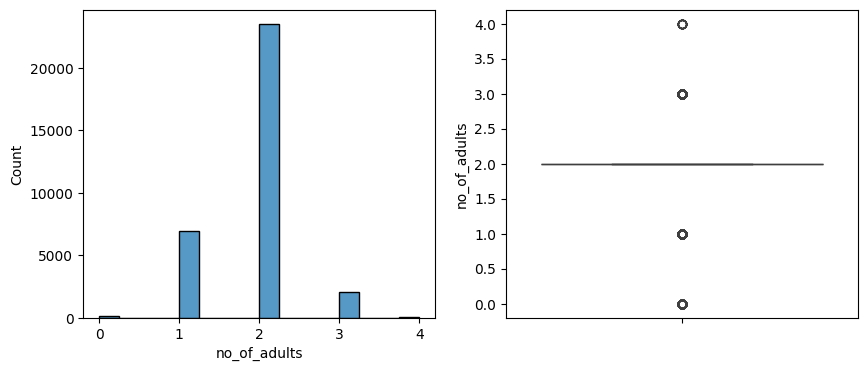

Skew :  -0.33657685248099545
Distribution of  no_of_children


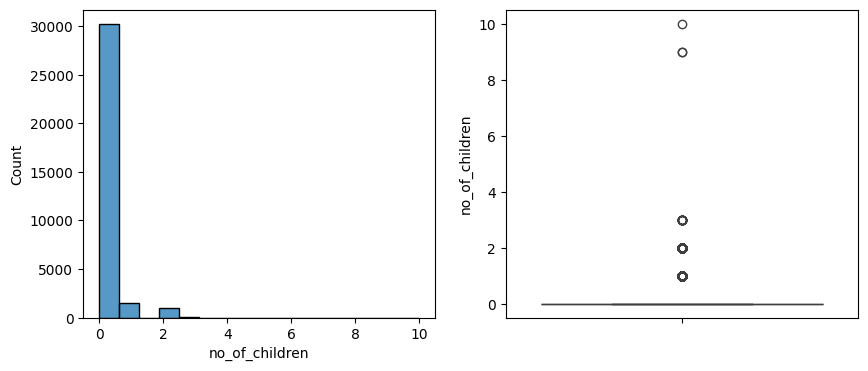

Skew :  4.800067777680227
Distribution of  no_of_weekend_nights


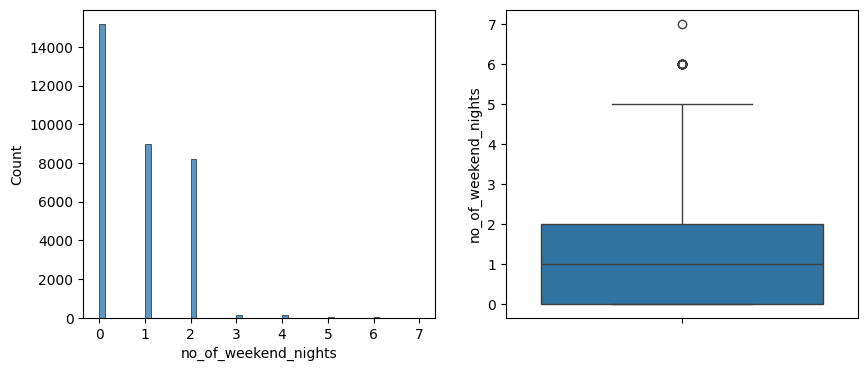

Skew :  0.7442137040234951
Distribution of  no_of_week_nights


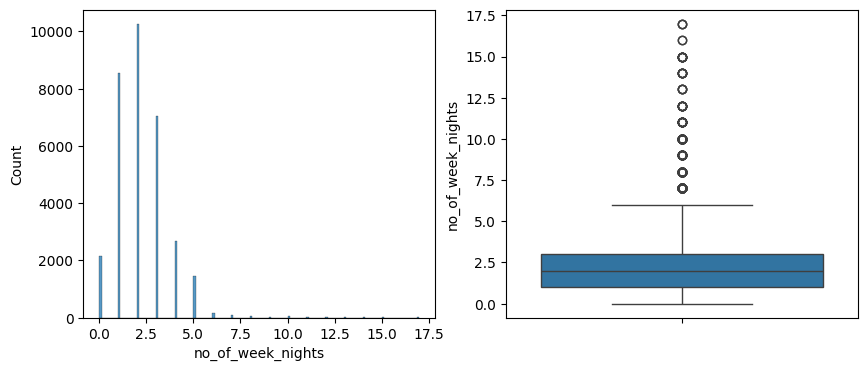

Skew :  1.631235957241721
Distribution of  lead_time


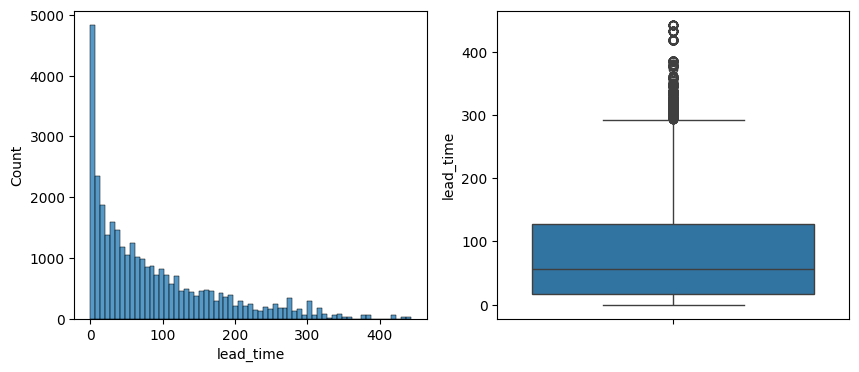

Skew :  1.2840170375976516
Distribution of  arrival_year


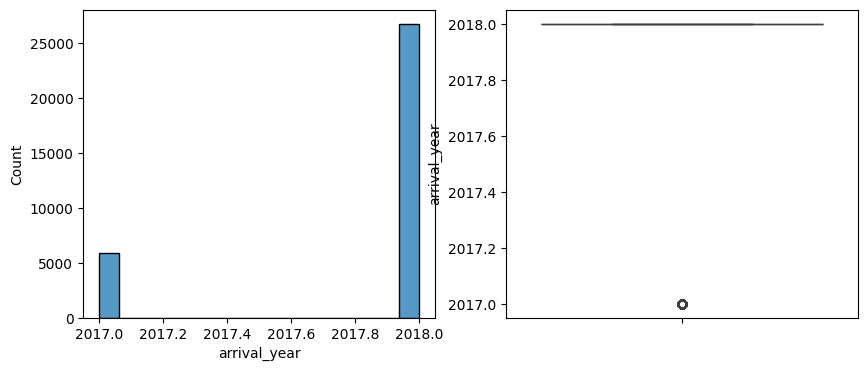

Skew :  -1.6708771061494818
Distribution of  arrival_month


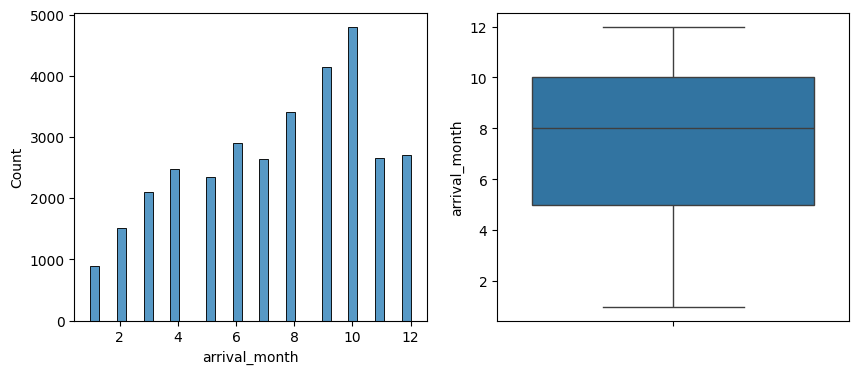

Skew :  -0.3466272428557518
Distribution of  arrival_date


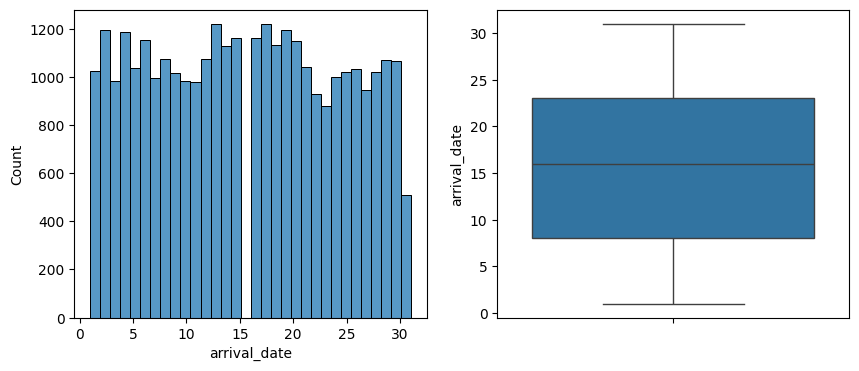

Skew :  0.02879760771217319
Distribution of  repeated_guest


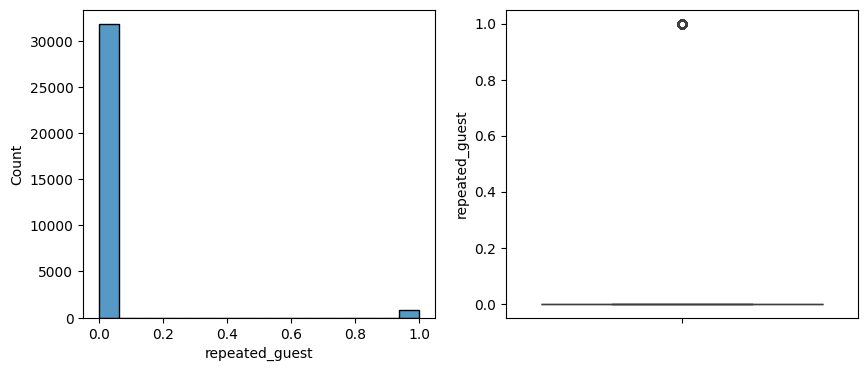

Skew :  6.030121387656191
Distribution of  no_of_previous_cancellations


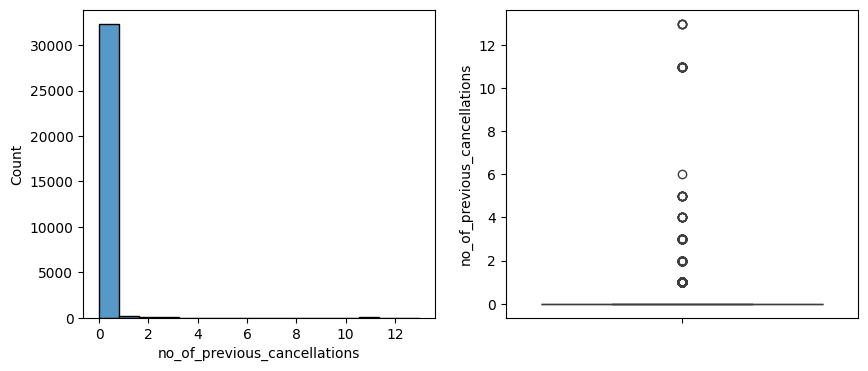

Skew :  25.24363557694706
Distribution of  no_of_previous_bookings_not_canceled


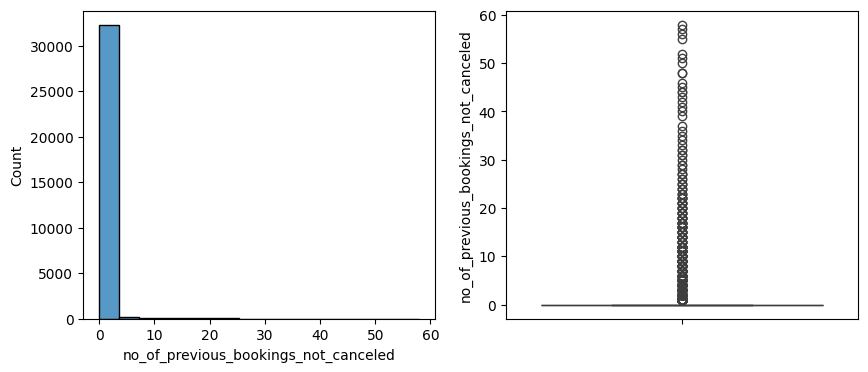

Skew :  19.305042227612525
Distribution of  avg_price_per_room


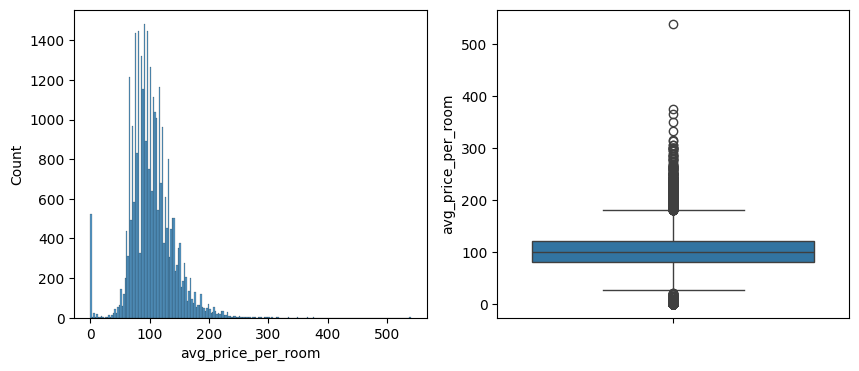

Skew :  0.6599251597010212
Distribution of  no_of_special_requests


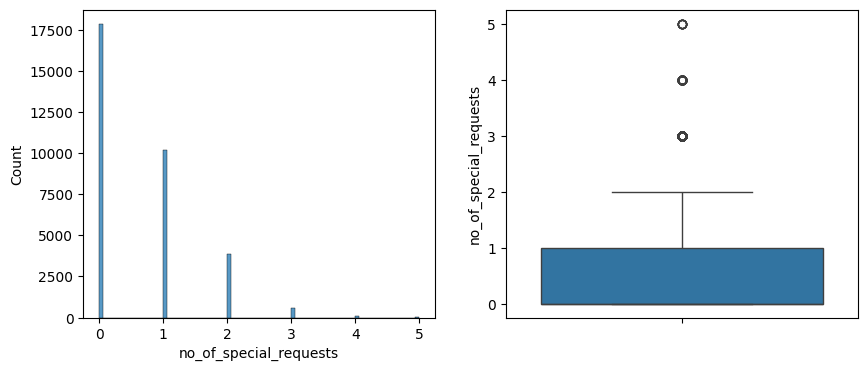

Skew :  1.1518159042331224


In [26]:
def check_numerical(data, cols):
    for i in cols:
        print("Distribution of ", i)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data[i])
        plt.subplot(1, 2, 2)
        sns.boxplot(data[i])
        plt.show()
        print("Skew : ", data[i].skew())

check_numerical(data_clean, num_cols)

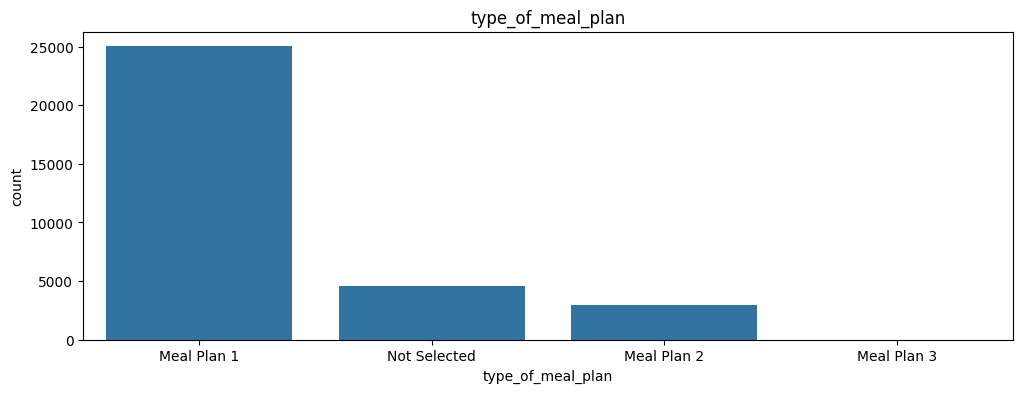

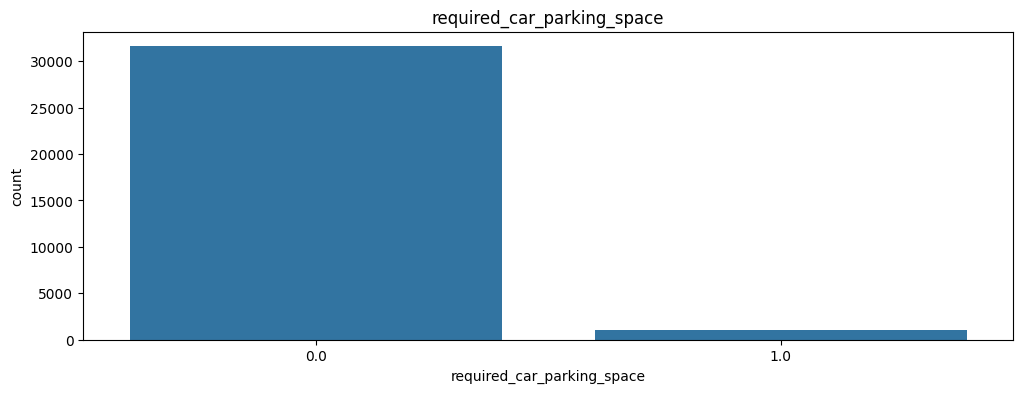

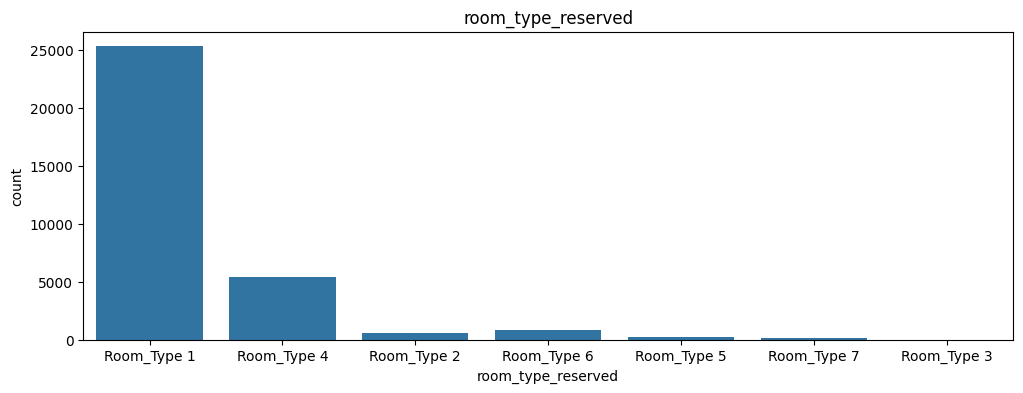

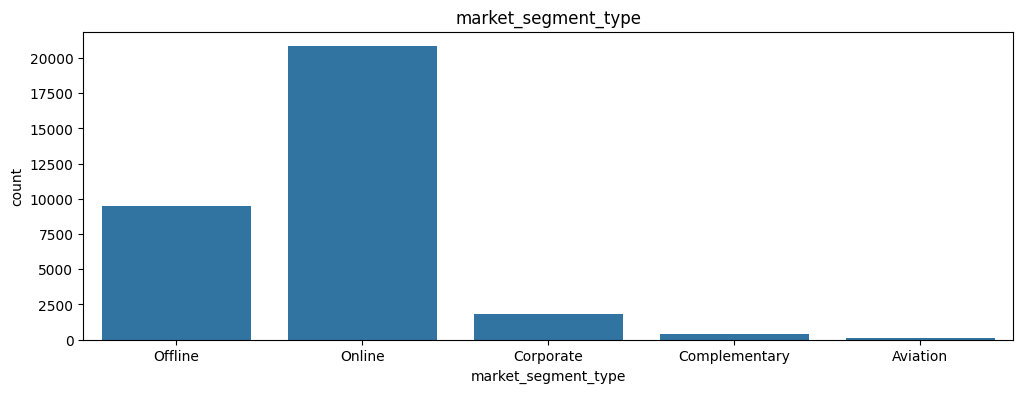

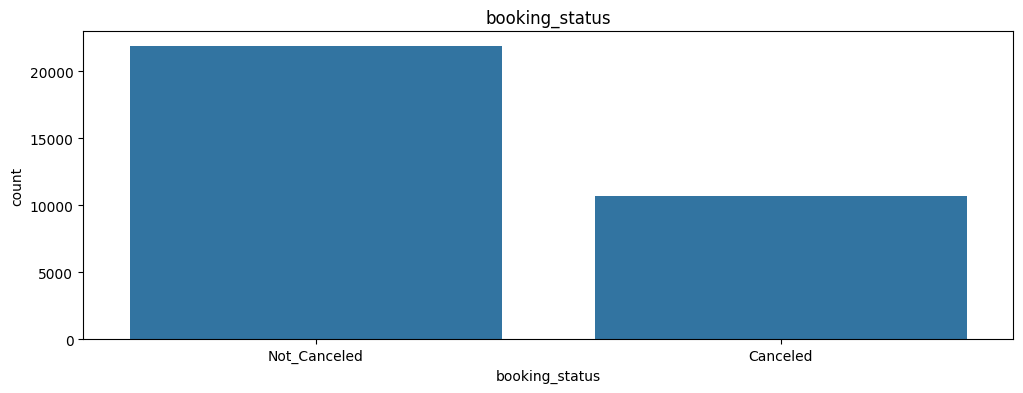

In [31]:
def check_categorical(data, cols):
    for i in cols:
        plt.figure(figsize=(12, 4))
        sns.countplot(x=data[i])
        plt.title(i)
    plt.show()

check_categorical(data_clean, cat_cols)

<Axes: >

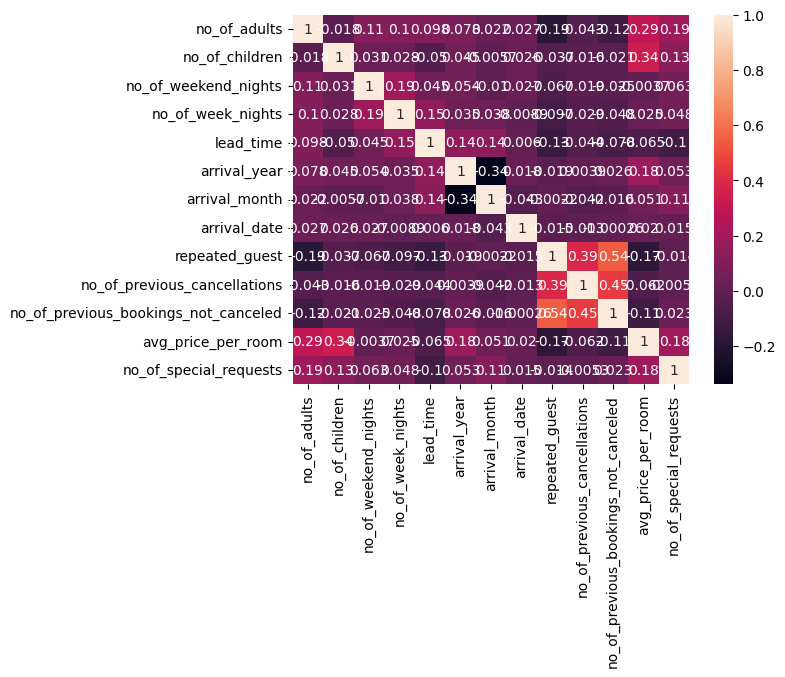

In [33]:
corr = data_clean[num_cols].corr()
sns.heatmap(corr, annot=True)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [37]:
labelEncoder = LabelEncoder()

for i in cat_cols:
    data_clean[i] = labelEncoder.fit_transform(data_clean[i])

data_clean

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [39]:
y = data_clean["booking_status"]
x = data_clean.drop(["booking_status"], axis=1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
standardScaler = StandardScaler()

x_train[num_cols] = standardScaler.fit_transform(x_train[num_cols])
x_test[num_cols] = standardScaler.transform(x_test[num_cols])

x_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
11356,0.300179,-0.261782,-0.932673,-0.148344,1,0,0,2.730417,0.465458,0.185803,0.280881,3,-0.161992,-0.063441,-0.089635,0.326776,0.485354
21097,0.300179,-0.261782,0.210919,-0.849733,0,0,0,-0.983414,0.465458,-1.769286,-0.291094,4,-0.161992,-0.063441,-0.089635,-0.357986,-0.786414
2764,-1.636541,-0.261782,0.210919,0.553044,3,0,0,-0.634151,0.465458,-1.443438,-0.977465,4,-0.161992,-0.063441,-0.089635,-1.025628,0.485354
334,0.300179,-0.261782,0.210919,-0.148344,0,0,3,-0.622509,-2.148422,0.837499,0.852856,3,-0.161992,-0.063441,-0.089635,-0.814493,0.485354
22368,0.300179,-0.261782,0.210919,0.553044,3,0,0,1.938754,0.465458,1.489195,1.539226,4,-0.161992,-0.063441,-0.089635,-1.428781,0.485354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-1.636541,-0.261782,-0.932673,-0.849733,0,0,0,-0.308172,0.465458,-0.791742,0.395276,4,-0.161992,-0.063441,-0.089635,0.512232,-0.786414
1939,2.236898,-0.261782,1.354511,-0.148344,0,0,3,-0.308172,0.465458,1.489195,-0.519885,4,-0.161992,-0.063441,-0.089635,0.440903,0.485354
22808,0.300179,-0.261782,1.354511,-0.148344,3,0,0,0.110943,0.465458,0.837499,-0.863070,4,-0.161992,-0.063441,-0.089635,0.127054,1.757121
1312,0.300179,-0.261782,-0.932673,-0.148344,0,1,0,-0.110257,-2.148422,0.837499,-0.291094,4,-0.161992,-0.063441,-0.089635,-0.151131,0.485354


In [45]:
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9050904630481448
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      2113
           1       0.92      0.95      0.93      4409

    accuracy                           0.91      6522
   macro avg       0.90      0.88      0.89      6522
weighted avg       0.90      0.91      0.90      6522



In [48]:
xgboost = XGBClassifier()

xgboost.fit(x_train, y_train)
y_pred2 = xgboost.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.8917509966268016
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      2113
           1       0.91      0.94      0.92      4409

    accuracy                           0.89      6522
   macro avg       0.88      0.87      0.87      6522
weighted avg       0.89      0.89      0.89      6522

